In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [8]:
# Read in the image and print some stats.
image = mpimg.imread('../images/test.jpg')
print("This image is:",type(image),'with dimension:',image.shape)

This image is: <class 'numpy.ndarray'> with dimension: (540, 960, 3)


In [9]:
# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

In [10]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0,539]
right_bottom = [900,300]
apex = [400,0]

In [11]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

/Users/haoxiaoyi/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 540 but corresponding boolean dimension is 539
  


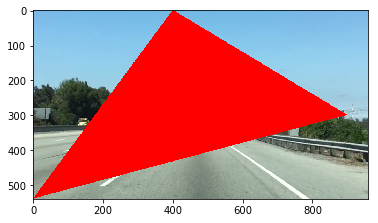

In [16]:
# Find the region inside the lines
XX,YY = np.meshgrid(np.arange(0,xsize),np.arange(1,ysize))
# 三个顶点的约束.
region_thresholds = (YY > (XX * fit_left[0] + fit_left[1]))&\
                    (YY > (XX * fit_right[0] + fit_right[1]))&\
                    (YY < (XX * fit_bottom[0] + fit_bottom[1]))
        
# 用红色显示区域
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)
plt.show()